In [2]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
kickstarters_2017 = pd.read_csv("../input/kickstarter-projects/ks-projects-201801.csv")

# set seed for reproducibility
np.random.seed(0)

In [3]:
# select the usd_goal_real column
original_data = pd.DataFrame(kickstarters_2017.usd_goal_real)

# scale the goals from 0 to 1
scaled_data = minmax_scaling(original_data, columns=['usd_goal_real'])

# min和max函数返回的是一个Series，iloc[0]是为了取出Series中的第一个元素
print('Original data\nPreview:\n', original_data.head())
print('Minimum value:', float(original_data.min().iloc[0]),
      '\nMaximum value:', float(original_data.max().iloc[0]))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_data.head())
print('Minimum value:', float(scaled_data.min().iloc[0]),
      '\nMaximum value:', float(scaled_data.max().iloc[0]))


Original data
Preview:
    usd_goal_real
0        1533.95
1       30000.00
2       45000.00
3        5000.00
4       19500.00
Minimum value: 0.01 
Maximum value: 166361390.71
______________________________

Scaled data
Preview:
    usd_goal_real
0       0.000009
1       0.000180
2       0.000270
3       0.000030
4       0.000117
Minimum value: 0.0 
Maximum value: 1.0


In [4]:
# select the usd_goal_real column
original_goal_data = pd.DataFrame(kickstarters_2017.goal)

Use `original_goal_data` to create a new DataFrame `scaled_goal_data` with values scaled between 0 and 1. You must use the `minmax_scaling()` function.

In [5]:
scaled_goal_data = minmax_scaling(original_goal_data, columns=['goal'])

scaled_goal_data.head()

,goal
0,0.000010
1,0.000300
2,0.000450
3,0.000050
4,0.000195


# 2) Practice normalization

Now you'll practice normalization. We begin by normalizing the amount of money pledged to each campaign.

In [6]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0

# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
# TODO: 2.md
normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0], 
                               name='usd_pledged_real', index=positive_pledges.index)

print('Original data\nPreview:\n', positive_pledges.head())
print('Minimum value:', float(positive_pledges.min()),
      '\nMaximum value:', float(positive_pledges.max()))
print('_'*30)

print('\nNormalized data\nPreview:\n', normalized_pledges.head())
print('Minimum value:', float(normalized_pledges.min()),
      '\nMaximum value:', float(normalized_pledges.max()))

Original data
Preview:
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: usd_pledged_real, dtype: float64
Minimum value: 0.45 
Maximum value: 20338986.27
______________________________

Normalized data
Preview:
 1    10.165142
2     6.468598
3     0.000000
4     9.129277
5    15.836852
Name: usd_pledged_real, dtype: float64
Minimum value: -0.7779954144288868 
Maximum value: 30.690538074206188


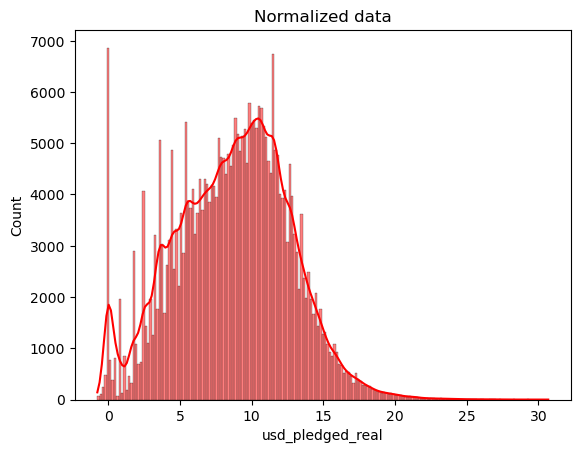

In [7]:
# plot normalized data
ax = sns.histplot(normalized_pledges, kde=True, color='red')
ax.set_title("Normalized data")
plt.show()

We used the "usd_pledged_real" column. Follow the same process to normalize the "pledged" column. 

Number of negative pledges: 52527
Number of negative pledges: 0


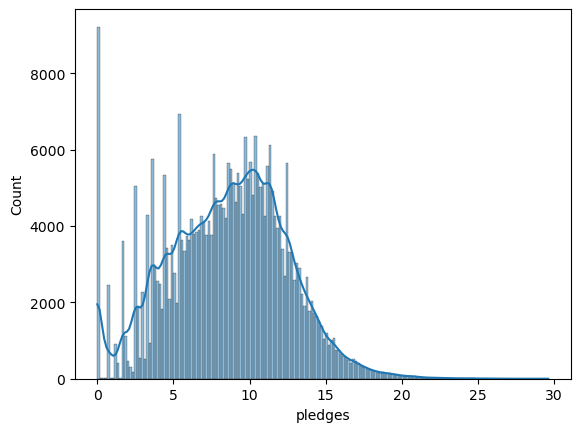

In [10]:
# TODO: Your code here!
pledges = kickstarters_2017['pledged']
# pledges = kickstarters_2017[kickstarters_2017['pledged'] > 0]['pledged']

pledges.head()

# pledges 数据中为负数的数目
print('Number of negative pledges:', np.sum(pledges <= 0)) # 全部为非负数

# 需要全部正数
positive_pledges = pledges[pledges > 0] # 参考上面注释的代码


print('Number of negative pledges:', np.sum(positive_pledges <= 0)) # 全部为非负数

normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0], name='pledges', index=positive_pledges.index)

ax = sns.histplot(normalized_pledges, kde=True)
ax.set_title('Normalized pledges')

## 下面是上面代码的官方答案

In [ ]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_positive_pledges = kickstarters_2017.pledged > 0

# get only positive pledges (using their indexes)
positive_pledges_only = kickstarters_2017.pledged.loc[index_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_values = pd.Series(stats.boxcox(positive_pledges_only)[0], 
                              name='pledged', index=positive_pledges_only.index)

# plot normalized data
ax = sns.histplot(normalized_values, kde=True)
ax.set_title("Normalized data")